#Import libraries

In [1]:
import os
import sys
from getpass import getpass
import json
import git
import dropbox
import torch.optim as optim

#Configure environment

In [2]:
os.environ["ENVIRONMENT"] = "windows"
os.environ["REPO_DIR"] = git.Repo(search_parent_directories=True).git.rev_parse("--show-toplevel")
os.environ["ROOT_DIR"] = os.path.abspath(os.path.join(os.getenv("REPO_DIR"), os.pardir))
os.environ["MODEL_ID"] = "2xzqklt8"
os.environ["MODEL_DIR"] = f"{os.getenv('REPO_DIR')}/models/model_{os.getenv('MODEL_ID')}"

#Import repository resources

In [3]:
sys.path.append(f"{os.getenv('REPO_DIR')}/src")
from helpers import *

sys.path.append(f"{os.getenv('MODEL_DIR')}/src")
from methods import *
from architecture import *

#Download datasets

In [4]:
# dbx_access_token = getpass("Enter your DropBox access token: ")

In [5]:
# download_datasets_from_dropbox(
#     dbx_access_token = dbx_access_token,
#     include_all_datasets = True,
#     use_thread = True
# )

#Work

In [6]:
num_epochs = 5
batch_size = 32
val_size = 25

In [7]:
device = set_device()
model = initialize_model(device=device)
train_dataset, val_dataset, benchmark_dataset = create_datasets(
    device=device, include_all_datasets=True)
train_dataloader, val_dataloader, benchmark_dataloader = create_dataloaders(
    train_dataset=train_dataset, val_dataset=val_dataset,
    benchmark_dataset=benchmark_dataset, batch_size=batch_size, val_size=val_size)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

Could not find GPU! :'( Using CPU only.


In [8]:
model, loss_hist, best_val_performance = training_loop(
    model=model, criterion=criterion, optimizer=optimizer, train_dataloader=train_dataloader,
    val_dataloader=val_dataloader, device=device, num_epochs=num_epochs, auto_stop=True)

c:\Users\Awrod\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


output.shape=torch.Size([5, 2, 128, 128])
label.shape=torch.Size([5, 2, 128, 128])

output[0,0,0,0]=tensor(0.0609)
output[0,1,0,0]=tensor(-0.0855)

label[0,0,0,0]=tensor(1.)
label[0,1,0,0]=tensor(0.)

B*W*H=81920
output.shape=torch.Size([81920, 2])
label.shape=torch.Size([81920, 2])

output_binary.shape=torch.Size([81920])
label_binary.shape=torch.Size([81920])

output_binary[0]=tensor(0)
label_binary[1]=tensor(0)

TN_total=40741
FP_total=40792
FN_total=228
TP_total=159
Epoch: 1/1   <>   Train Loss: 0.7067   <>   Val Acc: 49.93%


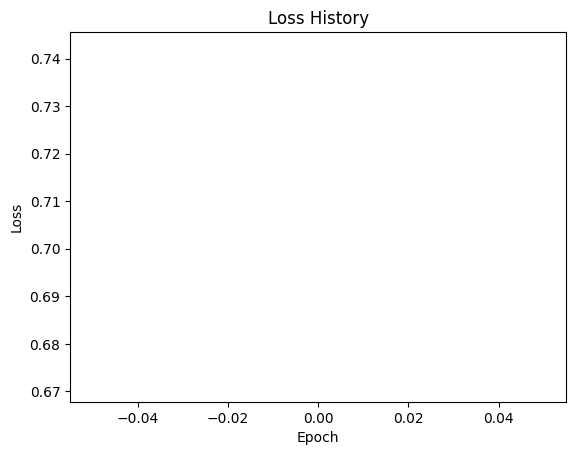

c:\Users\Awrod\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


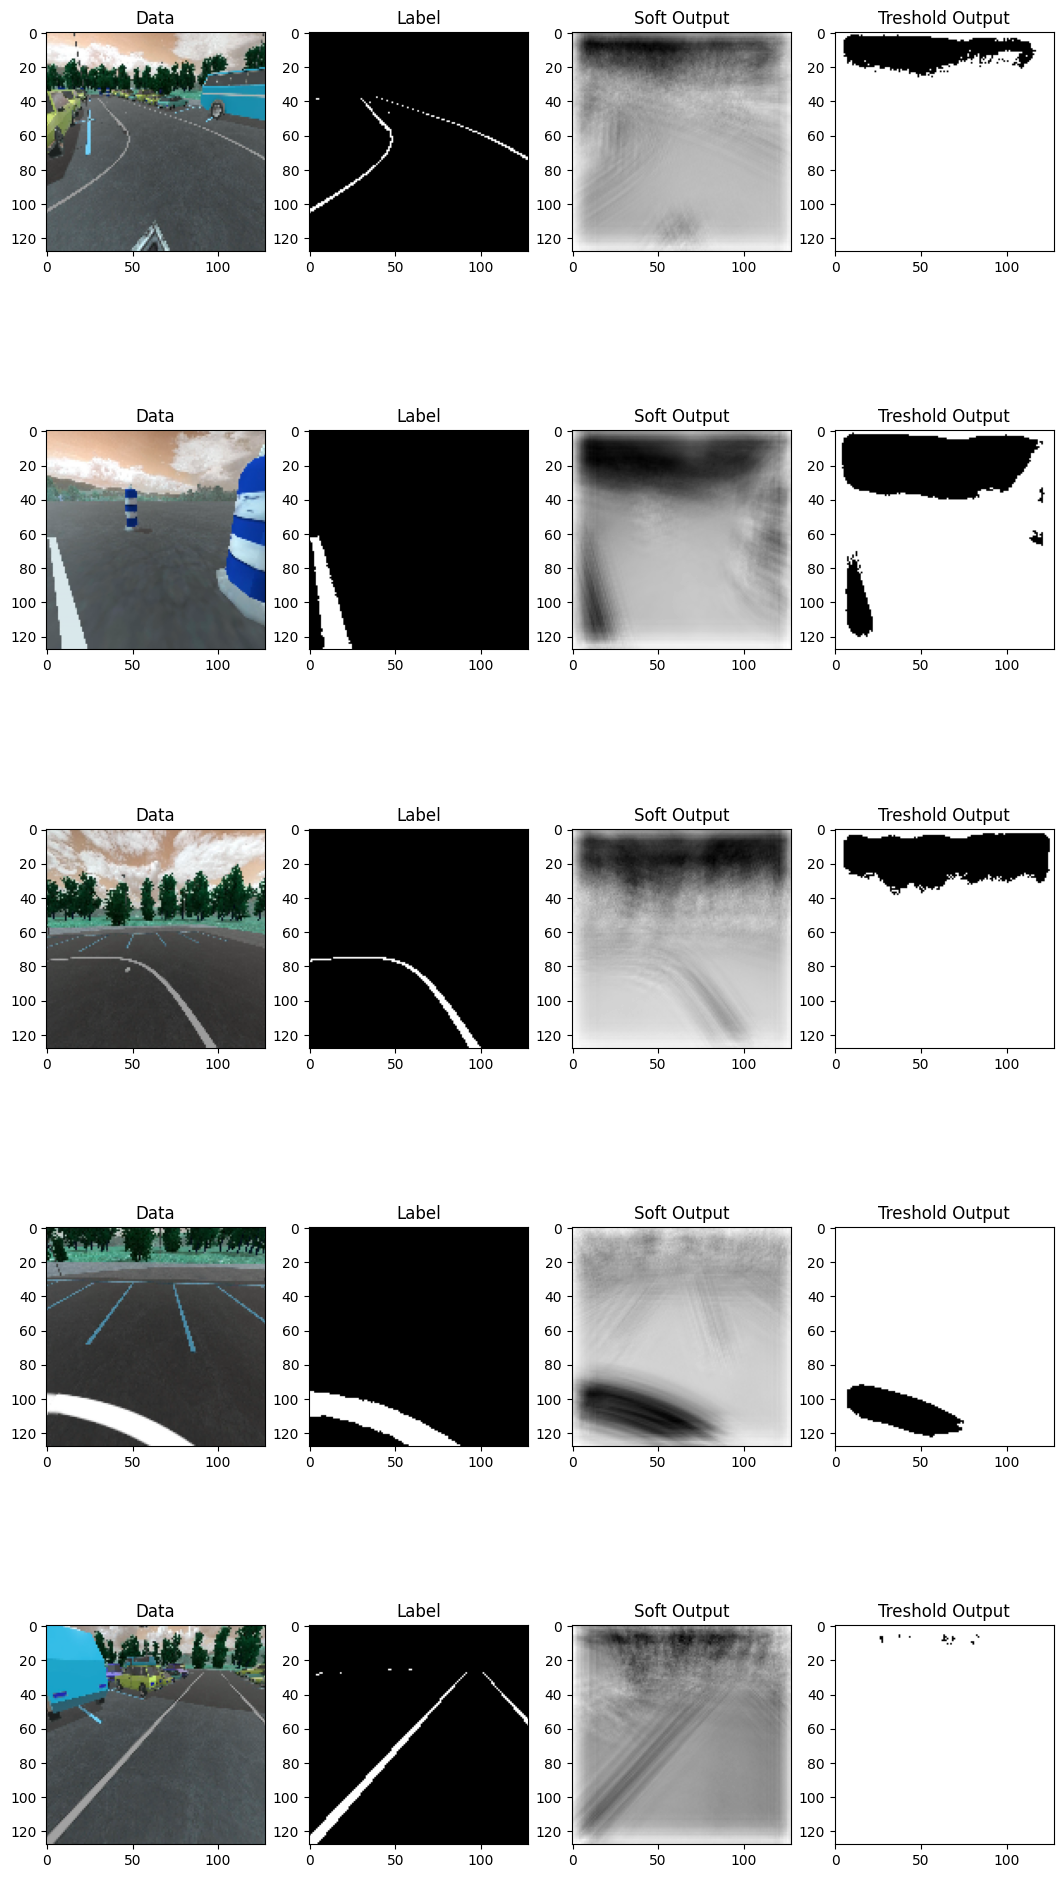

In [9]:
visualize_loss(loss_hist)
visualize_results(model, dataset=train_dataset, device=device, output_threshold=.4)

c:\Users\Awrod\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
c:\Users\Awrod\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will chan

TN_total=179740
FP_total=179041
FN_total=804
TP_total=863
benchmark_1 metrics:
	TN Rate: 0.5010
	FP Rate: 0.4990
	TP Rate: 0.5177
	FN Rate: 0.4823
	Accuracy: 0.5011
	Precision: 0.0048
	Recall: 0.5177
	Specificity: 0.5010
	F1 Score: 0.0095
	IoU Lane: 0.0048
	IoU Background: 0.4999
	Mean IoU: 0.2523
	Pixel Accuracy: 0.5011
	Mean Pixel Accuracy: 0.2523
	Frequency-Weighted IoU: 0.4976
	Dice Coefficient: 0.0095
	Boundary F1 Score: 0.0095


c:\Users\Awrod\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


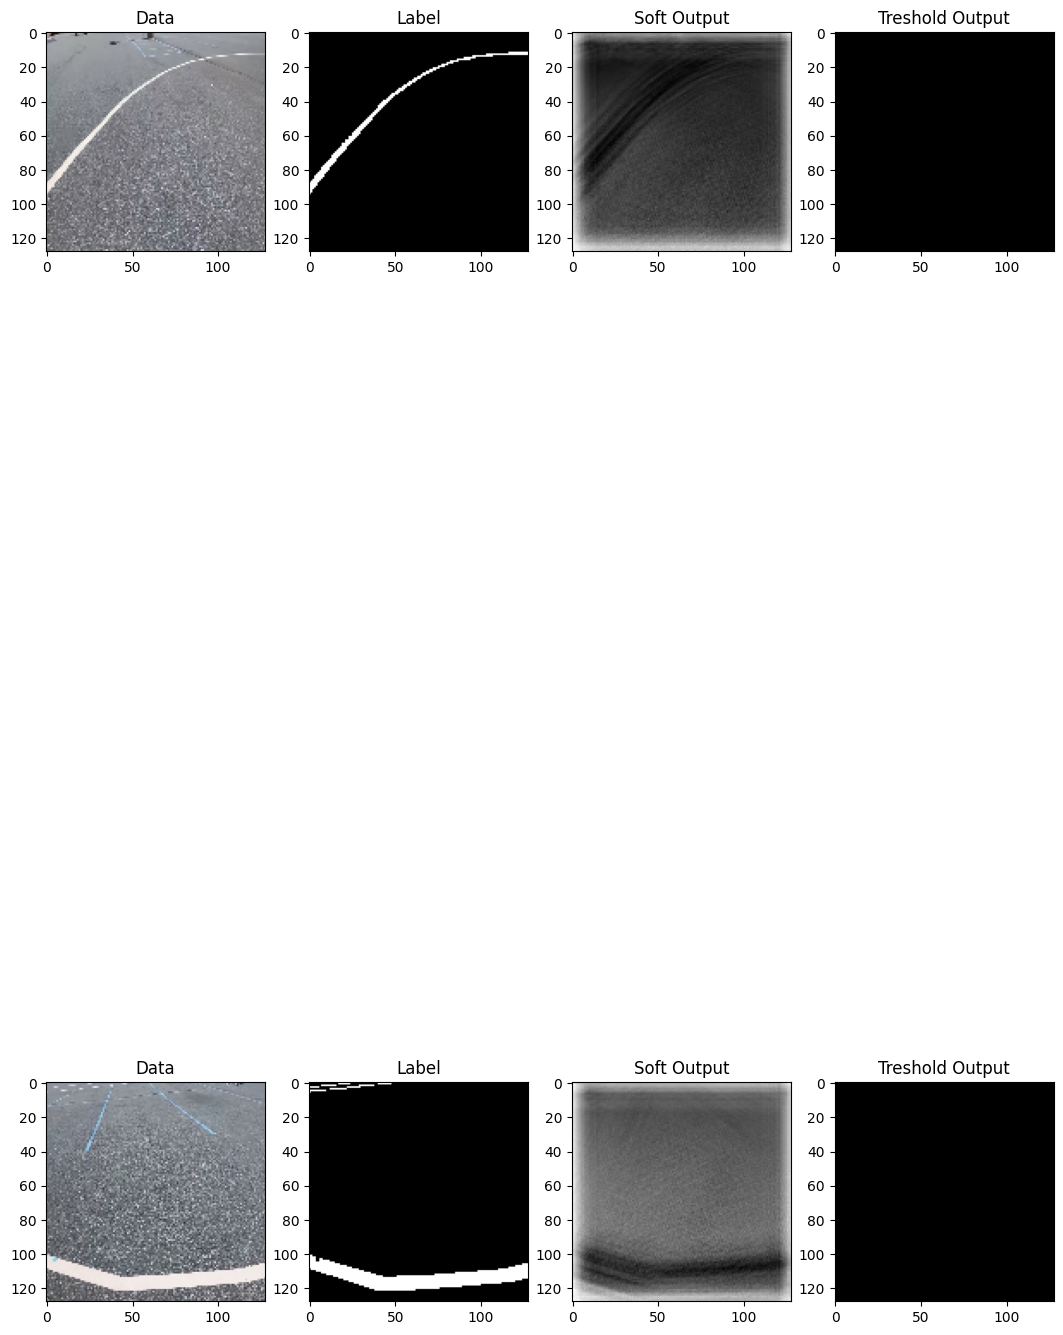

In [10]:
test_model_on_benchmarks(model, device, all_benchmarks=True, visualize_the_results=True)